<a href="https://colab.research.google.com/github/Anshuman-37/MLIS_Project_Ideal/blob/main/SGD_Classifier_with_main_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## DATA and Stuff 


In [1]:
## I am adding the data cleaning done by yixin here 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
import zipfile
import scipy

# Pandas display options
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', 500)
pd.set_option('display.max_info_columns', 500)
pd.set_option('display.max_info_rows', 4000)
pd.set_option('display.expand_frame_repr', True)
pd.set_option('display.width', 2000)
pd.set_option('display.max_rows', 500)

import warnings
warnings.filterwarnings('ignore')

### Getting the data

In [2]:
data = '/content/breast-cancer-wisconsin.data'

In [3]:
## Content in the data
with open(data) as f:
    print(f.read())

1000025,5,1,1,1,2,1,3,1,1,2
1002945,5,4,4,5,7,10,3,2,1,2
1015425,3,1,1,1,2,2,3,1,1,2
1016277,6,8,8,1,3,4,3,7,1,2
1017023,4,1,1,3,2,1,3,1,1,2
1017122,8,10,10,8,7,10,9,7,1,4
1018099,1,1,1,1,2,10,3,1,1,2
1018561,2,1,2,1,2,1,3,1,1,2
1033078,2,1,1,1,2,1,1,1,5,2
1033078,4,2,1,1,2,1,2,1,1,2
1035283,1,1,1,1,1,1,3,1,1,2
1036172,2,1,1,1,2,1,2,1,1,2
1041801,5,3,3,3,2,3,4,4,1,4
1043999,1,1,1,1,2,3,3,1,1,2
1044572,8,7,5,10,7,9,5,5,4,4
1047630,7,4,6,4,6,1,4,3,1,4
1048672,4,1,1,1,2,1,2,1,1,2
1049815,4,1,1,1,2,1,3,1,1,2
1050670,10,7,7,6,4,10,4,1,2,4
1050718,6,1,1,1,2,1,3,1,1,2
1054590,7,3,2,10,5,10,5,4,4,4
1054593,10,5,5,3,6,7,7,10,1,4
1056784,3,1,1,1,2,1,2,1,1,2
1057013,8,4,5,1,2,?,7,3,1,4
1059552,1,1,1,1,2,1,3,1,1,2
1065726,5,2,3,4,2,7,3,6,1,4
1066373,3,2,1,1,1,1,2,1,1,2
1066979,5,1,1,1,2,1,2,1,1,2
1067444,2,1,1,1,2,1,2,1,1,2
1070935,1,1,3,1,2,1,1,1,1,2
1070935,3,1,1,1,1,1,2,1,1,2
1071760,2,1,1,1,2,1,3,1,1,2
1072179,10,7,7,3,8,5,7,4,3,4
1074610,2,1,1,2,2,1,3,1,1,2
1075123,3,1,2,1,2,1,2,1,1,2
1079304

In [4]:
#setting the columns names that will be used for the data visualization
col_name = ['Samplecodenumber','ClumpThickness','UniformityofCellSize','UniformityofCellShape',
            'MarginalAdhesion','SingleEpithelialCellSize','BareNuclei',
            'BlandChromatin','NormalNucleoli','Mitoses','Class']
cancerdata = pd.read_csv(data,low_memory=False,names=col_name)
cancerdata.head()

,Samplecodenumber,ClumpThickness,UniformityofCellSize,UniformityofCellShape,MarginalAdhesion,SingleEpithelialCellSize,BareNuclei,BlandChromatin,NormalNucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


### Data Preperation 

In [5]:
cancerdata = cancerdata.drop(['Samplecodenumber'], 1)

In [6]:
# Check the loan status and distinct the target value.
cancerdata['Class'].value_counts()

2    458
4    241
Name: Class, dtype: int64

In [7]:
#Select the finished loan including repaid and late, delete the 'current' loan
Benign = cancerdata[(cancerdata.Class == 2) ].sample(240).index
Malignant = cancerdata[(cancerdata.Class == 4) ].sample(240).index
cancer = cancerdata.loc[Benign|Malignant]
cancer = cancer.reset_index(drop=True)
cancer['classes'] = cancer.Class.map({2:0,4:1})
cancer = cancer.drop(['Class'], 1)
cancer.head(10)

,ClumpThickness,UniformityofCellSize,UniformityofCellShape,MarginalAdhesion,SingleEpithelialCellSize,BareNuclei,BlandChromatin,NormalNucleoli,Mitoses,classes
0,5,1,1,1,2,1,3,1,1,0
1,5,4,4,5,7,10,3,2,1,0
2,3,1,1,1,2,2,3,1,1,0
3,4,1,1,3,2,1,3,1,1,0
4,8,10,10,8,7,10,9,7,1,1
5,1,1,1,1,2,10,3,1,1,0
6,2,1,1,1,2,1,1,1,5,0
7,1,1,1,1,1,1,3,1,1,0
8,2,1,1,1,2,1,2,1,1,0
9,5,3,3,3,2,3,4,4,1,1


In [8]:
cancer['classes'].value_counts()

1    240
0    240
Name: classes, dtype: int64

### Data preprocessing by attributes 

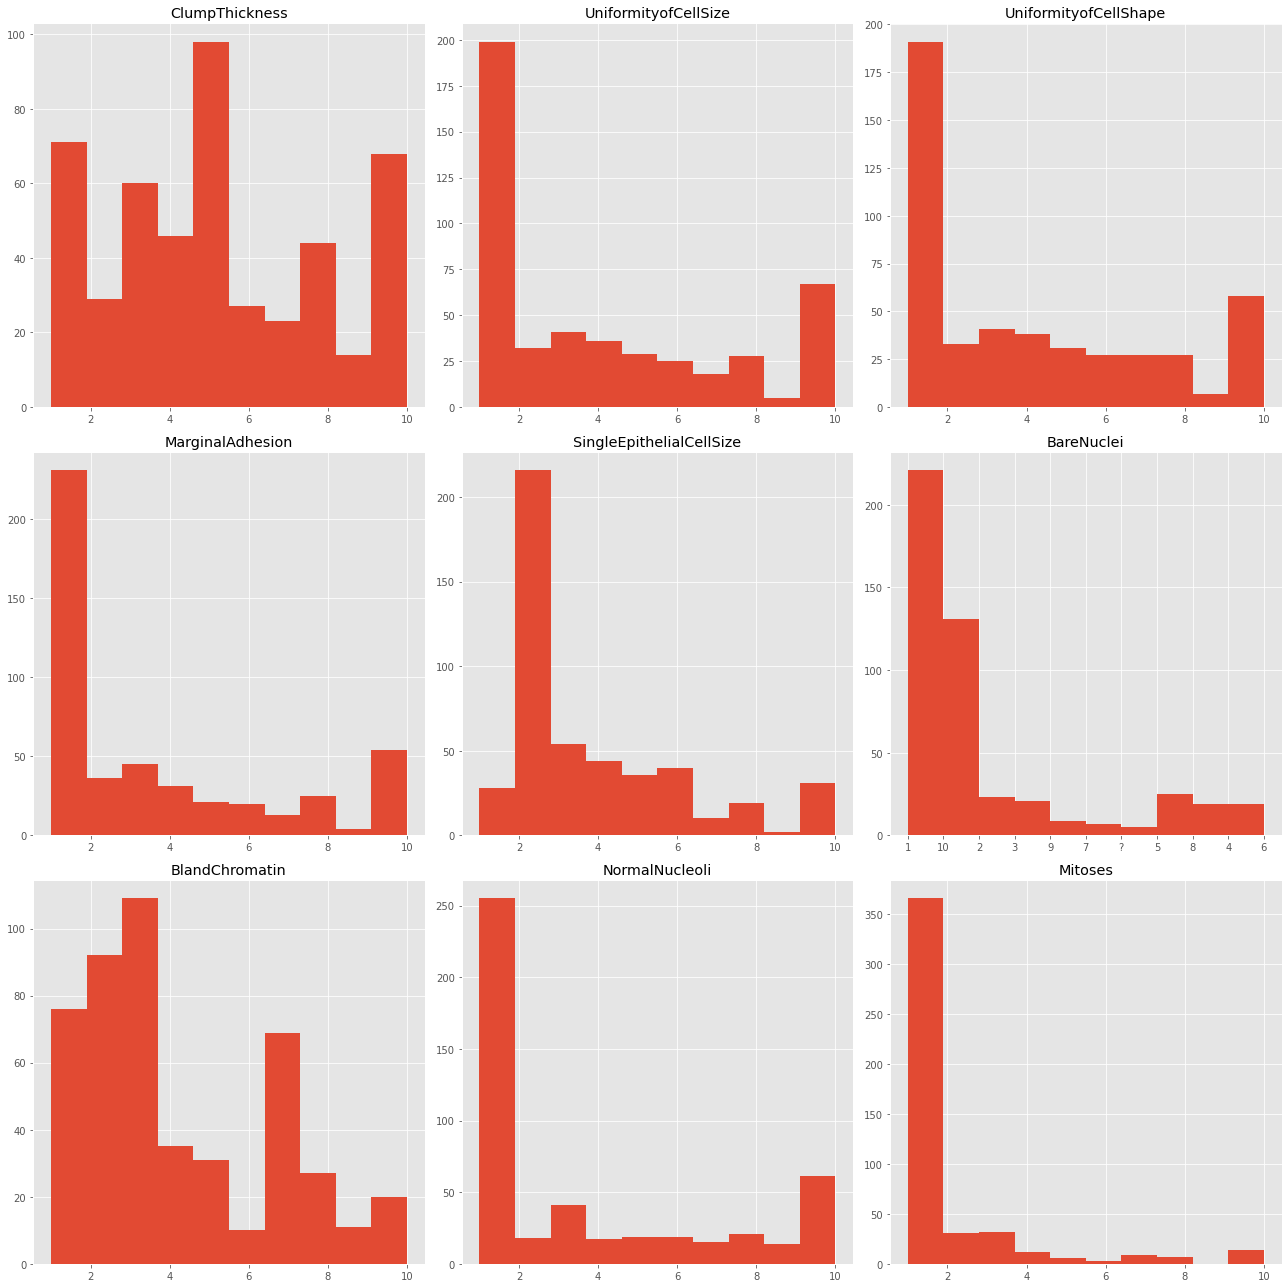

In [9]:
# plot date variables and find the variables with similar distributions, keep only one of them.
#['ClumpThickness','UniformityofCellSize','UniformityofCellShape','MarginalAdhesion',
#'SingleEpithelialCellSize','BareNuclei','BlandChromatin','NormalNucleoli','Mitoses']
fig, axs = plt.subplots(3, 3, figsize=(18,18))
axs[0,0].hist(cancer['ClumpThickness'])
axs[0,0].set_title("ClumpThickness")
axs[0,1].hist(cancer['UniformityofCellSize'])
axs[0,1].set_title("UniformityofCellSize")
axs[0,2].hist(cancer['UniformityofCellShape'])
axs[0,2].set_title("UniformityofCellShape")
axs[1,0].hist(cancer['MarginalAdhesion'])
axs[1,0].set_title("MarginalAdhesion")
axs[1,1].hist(cancer['SingleEpithelialCellSize'])
axs[1,1].set_title("SingleEpithelialCellSize")
axs[1,2].hist(cancer['BareNuclei'])
axs[1,2].set_title("BareNuclei")
axs[2,0].hist(cancer['BlandChromatin'])
axs[2,0].set_title("BlandChromatin")
axs[2,1].hist(cancer['NormalNucleoli'])
axs[2,1].set_title("NormalNucleoli")
axs[2,2].hist(cancer['Mitoses'])
axs[2,2].set_title("Mitoses")
fig.tight_layout()

In [10]:
cancer.dtypes.value_counts()

int64     9
object    1
dtype: int64

In [11]:
cancer.select_dtypes('object')

,BareNuclei
0,1
1,10
2,2
3,1
4,10
5,10
6,1
7,1
8,1
9,3


In [12]:
cancer = cancer.replace('?' ,np.nan)
##Finding the the count and percentage of values that are missing in the dataframe.
null1 = pd.DataFrame({'Count': cancer.isnull().sum(), 'Percent': 100*cancer.isnull().sum()/len(cancer)})

##printing columns with null count more than 0
null1[null1['Count'] > 0]


,Count,Percent
BareNuclei,5,1.041667


In [13]:
cancer["BareNuclei"]=cancer["BareNuclei"].astype(float)
cancer=cancer.fillna(cancer.mean())

In [14]:
# Correlation between feature and target variables
# Delete the variables having low or no correlation with target variables
corr_list1=cancer.corr()['classes'].abs().sort_values(ascending=False)
corr_list_new=corr_list1[corr_list1>0.01].index.values.tolist()
corr_list1
cancer=cancer[corr_list_new]
cancer.head(3)

,classes,UniformityofCellShape,UniformityofCellSize,BareNuclei,BlandChromatin,ClumpThickness,NormalNucleoli,MarginalAdhesion,SingleEpithelialCellSize,Mitoses
0,0,1,1,1.0,3,5,1,1,2,1
1,0,4,4,10.0,3,5,2,5,7,1
2,0,1,1,2.0,3,3,1,1,2,1


In [15]:
#find the variables with high correlations
cor1 = cancer.corr().abs()
list1 = cor1.stack().sort_values(ascending=False).drop_duplicates()  
high_corr= list1[list1>0.70].index.values.tolist()
high_corr.remove(high_corr[0])

display(list1)


Mitoses                   Mitoses                     1.000000
UniformityofCellSize      UniformityofCellShape       0.899454
classes                   UniformityofCellShape       0.810122
                          UniformityofCellSize        0.799975
BareNuclei                classes                     0.794158
BlandChromatin            UniformityofCellSize        0.740364
classes                   BlandChromatin              0.738089
SingleEpithelialCellSize  UniformityofCellSize        0.728269
UniformityofCellShape     BlandChromatin              0.721964
ClumpThickness            classes                     0.700278
UniformityofCellShape     SingleEpithelialCellSize    0.697336
                          NormalNucleoli              0.688131
NormalNucleoli            classes                     0.686994
UniformityofCellSize      NormalNucleoli              0.685009
                          MarginalAdhesion            0.678232
UniformityofCellShape     BareNuclei                  0

In [16]:
# for variable pairs with high correlation, keep only one of them
columnlist=list(cancer.columns)
len(high_corr)
for i in range(len(high_corr)):
    if "classes" in high_corr[i]:
        columnlist=columnlist
    else:
        if high_corr[i][0] in columnlist and high_corr[i][1] in columnlist:
            columnlist.remove(high_corr[i][1])
        else:
            columnlist=columnlist
cancer_final=cancer[columnlist]
#['ClumpThickness','UniformityofCellSize','UniformityofCellShape','MarginalAdhesion',
#'SingleEpithelialCellSize','BareNuclei','BlandChromatin','NormalNucleoli','Mitoses']


In [17]:
import random
from sklearn.model_selection import train_test_split
training_data, test_data = train_test_split(cancer_final,random_state=None, shuffle=True)
train_x=training_data.drop(['classes'], 1) 
train_y=training_data[['classes']]
test_x=test_data.drop(['classes'], 1)
test_y=test_data[['classes']]

In [18]:
#Re-do data preparation: delete the outliers and perform normalisation
# from sklearn.preprocessing import StandardScaler
# Remove outliers
cancer_norm = cancer_final[(np.abs(scipy.stats.zscore(cancer_final)) < 3).all(axis=1)]
# Zero mean normalisation
cancer_norm.iloc[:,1:]=(cancer_norm.iloc[:,1:]-cancer_norm.iloc[:,1:].mean())/cancer_norm.iloc[:,1:].std()

In [19]:
cancer_norm.head()

,classes,BareNuclei,BlandChromatin,ClumpThickness,NormalNucleoli,MarginalAdhesion,SingleEpithelialCellSize,Mitoses
0,0,-0.867095,-0.364273,0.000000,-0.722638,-0.750496,-0.658219,-0.408805
1,0,1.438747,-0.364273,0.000000,-0.417495,0.556819,1.512200,-0.408805
2,0,-0.610890,-0.364273,-0.692337,-0.722638,-0.750496,-0.658219,-0.408805
3,0,-0.867095,-0.364273,-0.346168,-0.722638,-0.096838,-0.658219,-0.408805
4,1,1.438747,1.968768,1.038505,1.108223,1.537306,1.512200,-0.408805


In [20]:
#split the new dataset
training_data_norm, test_data_norm = train_test_split(cancer_norm,random_state=None, shuffle=True)
train_x_norm=training_data_norm.drop(['classes'], 1) 
train_y_norm=training_data_norm[['classes']]
test_x_norm=test_data_norm.drop(['classes'], 1)
test_y_norm=test_data_norm[['classes']]

In [21]:
x_train = np.array(train_x_norm)
print(x_train.shape)
y_train = np.array(train_y_norm)
print(y_train.shape)
x_test = np.array(test_x_norm)
print(x_test.shape)
y_test = np.array(test_y_norm)
print(y_test.shape)

(344, 7)
(344, 1)
(115, 7)
(115, 1)


## Classifier 

In [22]:
def initialize_weights(dim):
    ''' In this function, we will initialize our weights and bias'''
    # Here dimenstion refer to the number of the attributes in the data
    w = np.zeros(shape=len(dim))
    b = 0
    return w,b

In [23]:
dim=x_train[0]
w,b = initialize_weights(dim)
print('w =',(w))
print('b =',b)
print('w',np.sum(w))

w = [0. 0. 0. 0. 0. 0. 0.]
b = 0
w 0.0


In [24]:
## Grader Function
## Dont run this cell untill and unless you want to check wether everything is fine or not 
w,b = initialize_weights(dim)
def grader_weights(w,b):
  assert((len(w)==len(dim)) and b==0 and np.sum(w)==0.0)
  return True
grader_weights(w,b)

True

In [25]:
def sigmoid(z):
    ''' In this function, we will return sigmoid of z'''
    # compute sigmoid(z) and return
    return 1/(1+np.exp(-z))

In [26]:
def log_loss(y_labels,y_predicted):
    '''This function will return the log loss of the function'''
    loss = -1 * (np.sum((y_labels * np.log10(y_predicted))+ \
                      ((1-y_labels)*np.log10(1-y_predicted))))/len(y_labels)
    return loss

In [27]:
def gradient_dw(x,y,w,b,alpha,N):
    '''In this function, we will compute the gardient w.r.to w '''
    # Calculcating the graindent of weighted vectors
    return x * (y - sigmoid(np.dot(w, x) + b)) - alpha/N*w

In [28]:
def gradient_db(x,y,w,b):
    '''In this function, we will compute gradient w.r.to b '''
    # Calculating the gradient of bais
    return y - sigmoid(np.dot(w, x) + b)

In [29]:
def train(X_train,y_train,X_test,y_test,epochs,alpha,eta0,p):
    ''' In this function, we will implement logistic regression'''
    
    w,b = initialize_weights(X_train[0]) # intilize weight vectors
    same_loss_counter = 0
    N = len(X_train)
    train_loss , test_loss = [],[]
    part_no = 0
    part_size = 25
    ctr = 0
    n = len(X_train)
    
    # Loop to traveres in epoches
    for i in tqdm(range(0,epochs)):
        # Loop to access data point in the 
        for j in range(part_size):
            
            # Calculating gradient of w and adding it to the existing one    
            w = w + eta0*gradient_dw(X_train[(j+part_no)%n], y_train[(j+part_no)%n],w, b, alpha, len(X_train))
            
            #Calculating gradient of b and adding it to the existing one
            b = b + eta0*gradient_db(X_train[(j+part_no)%n], y_train[(j+part_no)%n], w, b)
        

        part_no = (part_no + part_size)%n # To updtae the new part

        #Predicting the traing data in comparison of the the xtrain
        y_pred_train = np.array([sigmoid(np.dot(w, x)+b) for x in X_train])
        
        #Predicting the test data in comaprison of the xtest
        y_pred_test = np.array([sigmoid(np.dot(w, x)+b) for x in X_test])

        #Calculating the loss on for training data
        loss = log_loss(y_train,y_pred_train)
        train_loss.append(loss)
        
        #Calculatig the loss onfor testing data
        loss = log_loss(y_test,y_pred_test)
        test_loss.append(loss)

        ## Printing values
        print('\n-- Epoch no(iteration no) ', i+1,'\n Train data set : ')
        #print('Actual values: ', y_train ,'\n Predicted Values : ', y_pred_train)
        #print('Test data set :') 
       # print('Actual values: ', y_test, '\nPredicated Values : ', y_pred_test)
        print('W intercept: {}, B intercept: {}, Train loss: {}, Test loss: {}'\
              .format(w, b, train_loss[i], test_loss[i]))
    return w,b,train_loss,test_loss

In [30]:
import numpy as np
import pandas as pd
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

alpha=0.0001
eta0=0.01
N=len(x_train)
epochs=100
p = 2
w,b,train_loss,test_loss=train(x_train,y_train,x_test,y_test,epochs,alpha,eta0,p)

  0%|          | 0/100 [00:00<?, ?it/s]


-- Epoch no(iteration no)  1 
 Train data set : 
W intercept: [0.09378934 0.06366788 0.09572743 0.06796474 0.05708348 0.06488083
 0.0611691 ], B intercept: [-0.00312706], Train loss: 0.23553051531111385, Test loss: 0.2341105140679492

-- Epoch no(iteration no)  2 
 Train data set : 
W intercept: [0.16794052 0.13108358 0.1404377  0.11812889 0.11665895 0.13682411
 0.09999935], B intercept: [-0.01006816], Train loss: 0.1933144566824417, Test loss: 0.18973948112310438

-- Epoch no(iteration no)  3 
 Train data set : 
W intercept: [0.22175959 0.17176707 0.19030704 0.17191471 0.16332354 0.18712552
 0.134391  ], B intercept: [-0.01068979], Train loss: 0.1658378373813592, Test loss: 0.1603334296937495

-- Epoch no(iteration no)  4 
 Train data set : 
W intercept: [0.2771237  0.23953116 0.21884103 0.22139958 0.2122456  0.22733558
 0.15176247], B intercept: [-0.02598477], Train loss: 0.14367332992193463, Test loss: 0.13664567818033144

-- Epoch no(iteration no)  5 
 Train data set : 
W intercep

 12%|█▏        | 12/100 [00:00<00:00, 110.81it/s]


-- Epoch no(iteration no)  9 
 Train data set : 
W intercept: [0.43915741 0.39912085 0.38434936 0.37318642 0.31129422 0.31360439
 0.19598178], B intercept: [-0.01307352], Train loss: 0.09913488696638285, Test loss: 0.08804338972694817

-- Epoch no(iteration no)  10 
 Train data set : 
W intercept: [0.47590177 0.42276529 0.41866623 0.38253291 0.32592848 0.32892655
 0.19678204], B intercept: [-0.01423935], Train loss: 0.09380085195199855, Test loss: 0.08220463868344767

-- Epoch no(iteration no)  11 
 Train data set : 
W intercept: [0.49568375 0.44737946 0.45027876 0.3948015  0.34970449 0.34491012
 0.19566299], B intercept: [-0.01548183], Train loss: 0.08936355983338884, Test loss: 0.07735050881017397

-- Epoch no(iteration no)  12 
 Train data set : 
W intercept: [0.51710031 0.46903146 0.45873599 0.40600496 0.39352599 0.35945702
 0.19047966], B intercept: [0.00644922], Train loss: 0.08565780533716735, Test loss: 0.07333474265317921

-- Epoch no(iteration no)  13 
 Train data set : 
W i

 24%|██▍       | 24/100 [00:00<00:00, 86.74it/s] 


-- Epoch no(iteration no)  21 
 Train data set : 
W intercept: [0.6836621  0.58555522 0.61314195 0.50030686 0.46649149 0.47364201
 0.25507402], B intercept: [0.02134273], Train loss: 0.06731675065795889, Test loss: 0.051639542717136826

-- Epoch no(iteration no)  22 
 Train data set : 
W intercept: [0.68641257 0.60157373 0.61780991 0.51661719 0.47593117 0.45336834
 0.25822735], B intercept: [0.01615135], Train loss: 0.0667141741617078, Test loss: 0.051125135851758784

-- Epoch no(iteration no)  23 
 Train data set : 
W intercept: [0.69975307 0.61507705 0.62580383 0.52973426 0.48527944 0.46106378
 0.26156868], B intercept: [0.01277009], Train loss: 0.06557508109239056, Test loss: 0.049702300649560514

-- Epoch no(iteration no)  24 
 Train data set : 
W intercept: [0.71974867 0.62652808 0.6457792  0.53106025 0.48993913 0.46575787
 0.26347994], B intercept: [0.01528751], Train loss: 0.06435163783396117, Test loss: 0.0483242910653748

-- Epoch no(iteration no)  25 
 Train data set : 
W in

 33%|███▎      | 33/100 [00:00<00:00, 85.18it/s]


-- Epoch no(iteration no)  26 
 Train data set : 
W intercept: [0.73511287 0.65132681 0.66312535 0.53708248 0.531703   0.48176752
 0.25709528], B intercept: [0.03915209], Train loss: 0.06241489657900932, Test loss: 0.04617720132875163

-- Epoch no(iteration no)  27 
 Train data set : 
W intercept: [0.75131058 0.66273473 0.66954297 0.54468411 0.54421873 0.49130956
 0.26197087], B intercept: [0.02858791], Train loss: 0.0615003096234926, Test loss: 0.04501124035281429

-- Epoch no(iteration no)  28 
 Train data set : 
W intercept: [0.76997757 0.66211756 0.69236294 0.54782195 0.54376781 0.49464723
 0.29113106], B intercept: [0.03866887], Train loss: 0.060475794387717934, Test loss: 0.043831157016328316

-- Epoch no(iteration no)  29 
 Train data set : 
W intercept: [0.77447672 0.66341625 0.70357962 0.56067532 0.54966991 0.49867646
 0.29683666], B intercept: [0.027777], Train loss: 0.059980939445334884, Test loss: 0.04311607116267215

-- Epoch no(iteration no)  30 
 Train data set : 
W int

 42%|████▏     | 42/100 [00:00<00:00, 84.79it/s]


-- Epoch no(iteration no)  38 
 Train data set : 
W intercept: [0.85285398 0.74033122 0.7897064  0.6005975  0.57210187 0.52676844
 0.30086325], B intercept: [0.06249135], Train loss: 0.05540597469831728, Test loss: 0.03751493138377074

-- Epoch no(iteration no)  39 
 Train data set : 
W intercept: [0.8559583  0.74461544 0.79050111 0.61009917 0.596923   0.537143
 0.29906964], B intercept: [0.06709426], Train loss: 0.054947463034536986, Test loss: 0.036867059105593826

-- Epoch no(iteration no)  40 
 Train data set : 
W intercept: [0.86709953 0.75791035 0.79101238 0.60910129 0.60969975 0.5424684
 0.29705655], B intercept: [0.07663541], Train loss: 0.05447974282295415, Test loss: 0.036337290930876225

-- Epoch no(iteration no)  41 
 Train data set : 
W intercept: [0.87838418 0.76231488 0.79783694 0.61311022 0.61881538 0.54884651
 0.30052846], B intercept: [0.07030028], Train loss: 0.05408326810306707, Test loss: 0.035787160902669306

-- Epoch no(iteration no)  42 
 Train data set : 
W in

 51%|█████     | 51/100 [00:00<00:00, 82.27it/s]


-- Epoch no(iteration no)  43 
 Train data set : 
W intercept: [0.90122731 0.76111627 0.81970271 0.61961156 0.61704051 0.55822117
 0.32804301], B intercept: [0.07691409], Train loss: 0.05330574242457102, Test loss: 0.03475592952696723

-- Epoch no(iteration no)  44 
 Train data set : 
W intercept: [0.9050148  0.76563787 0.82630743 0.62391895 0.62399048 0.57395026
 0.32938176], B intercept: [0.07860194], Train loss: 0.052969845533084675, Test loss: 0.03420475204614926

-- Epoch no(iteration no)  45 
 Train data set : 
W intercept: [0.91548321 0.76970019 0.82618611 0.62526813 0.62981148 0.57069659
 0.32692264], B intercept: [0.08359193], Train loss: 0.052755544112800055, Test loss: 0.033973480490480705

-- Epoch no(iteration no)  46 
 Train data set : 
W intercept: [0.92619689 0.76838569 0.84876302 0.62287538 0.62033506 0.5696091
 0.33194701], B intercept: [0.0988581], Train loss: 0.052350895344297675, Test loss: 0.033543736857660794

-- Epoch no(iteration no)  47 
 Train data set : 
W 

 60%|██████    | 60/100 [00:00<00:00, 81.87it/s]


-- Epoch no(iteration no)  56 
 Train data set : 
W intercept: [0.97887337 0.82787597 0.9113691  0.66501391 0.66764158 0.58709791
 0.35341889], B intercept: [0.11880233], Train loss: 0.04986122096770495, Test loss: 0.030305712068144572

-- Epoch no(iteration no)  57 
 Train data set : 
W intercept: [0.98769633 0.83087485 0.91226342 0.66273791 0.66800298 0.59053748
 0.35515356], B intercept: [0.11754098], Train loss: 0.04974731459507007, Test loss: 0.030145012553244206

-- Epoch no(iteration no)  58 
 Train data set : 
W intercept: [0.99066751 0.83420047 0.91708357 0.66708007 0.67522626 0.60545167
 0.35602143], B intercept: [0.11766441], Train loss: 0.04954470171828, Test loss: 0.02974587065745141

-- Epoch no(iteration no)  59 
 Train data set : 
W intercept: [0.99919065 0.83691501 0.91640319 0.66667101 0.67950729 0.60081045
 0.35294887], B intercept: [0.12327505], Train loss: 0.04942685407146083, Test loss: 0.02964406276700697

-- Epoch no(iteration no)  60 
 Train data set : 
W inte

 69%|██████▉   | 69/100 [00:00<00:00, 81.82it/s]


-- Epoch no(iteration no)  61 
 Train data set : 
W intercept: [1.02074569 0.84466686 0.94326935 0.66397506 0.67310822 0.60202841
 0.35691434], B intercept: [0.14136959], Train loss: 0.048860100217872106, Test loss: 0.028993391024704312

-- Epoch no(iteration no)  62 
 Train data set : 
W intercept: [1.01125586 0.85122882 0.94671975 0.67003381 0.67026022 0.60921164
 0.34837516], B intercept: [0.14247282], Train loss: 0.04885130223601201, Test loss: 0.02888439674948416

-- Epoch no(iteration no)  63 
 Train data set : 
W intercept: [1.02008325 0.8523396  0.94523971 0.67189118 0.67931908 0.60520144
 0.34960202], B intercept: [0.13803031], Train loss: 0.04875970692564629, Test loss: 0.028781588330495933

-- Epoch no(iteration no)  64 
 Train data set : 
W intercept: [1.01207486 0.86506005 0.94989069 0.68290913 0.67478088 0.58756709
 0.34930414], B intercept: [0.13980095], Train loss: 0.048716544188202086, Test loss: 0.028836448576453063

-- Epoch no(iteration no)  65 
 Train data set : 


 87%|████████▋ | 87/100 [00:01<00:00, 78.23it/s]


-- Epoch no(iteration no)  77 
 Train data set : 
W intercept: [1.06489146 0.90696198 1.01659175 0.70305637 0.70928475 0.60321115
 0.36968317], B intercept: [0.17480159], Train loss: 0.04699204390815393, Test loss: 0.02657392643248761

-- Epoch no(iteration no)  78 
 Train data set : 
W intercept: [1.07127884 0.91257449 1.01909346 0.70895438 0.7114327  0.60511743
 0.36916845], B intercept: [0.17682617], Train loss: 0.04685973385238063, Test loss: 0.026340370452947626

-- Epoch no(iteration no)  79 
 Train data set : 
W intercept: [1.07805052 0.91631638 1.02776341 0.708377   0.70916671 0.6072726
 0.37550172], B intercept: [0.17808737], Train loss: 0.046712718193692576, Test loss: 0.026152813232311733

-- Epoch no(iteration no)  80 
 Train data set : 
W intercept: [1.07774851 0.92155094 1.03582849 0.71135717 0.71418497 0.60824762
 0.37374067], B intercept: [0.18235462], Train loss: 0.04657785464957487, Test loss: 0.025979536963964416

-- Epoch no(iteration no)  81 
 Train data set : 
W 

100%|██████████| 100/100 [00:01<00:00, 80.65it/s]


-- Epoch no(iteration no)  93 
 Train data set : 
W intercept: [1.12206419 0.956749   1.09307359 0.72439181 0.73704621 0.61530485
 0.39086374], B intercept: [0.21781969], Train loss: 0.04540289279002667, Test loss: 0.024435695464937936

-- Epoch no(iteration no)  94 
 Train data set : 
W intercept: [1.12111875 0.95830136 1.08958259 0.73075158 0.75590322 0.62270987
 0.38935791], B intercept: [0.22147245], Train loss: 0.04532192628506749, Test loss: 0.024243311653756334

-- Epoch no(iteration no)  95 
 Train data set : 
W intercept: [1.12636682 0.96502018 1.08874708 0.72888117 0.76583477 0.6246203
 0.38635061], B intercept: [0.23037417], Train loss: 0.04520831272190201, Test loss: 0.024109089692353456

-- Epoch no(iteration no)  96 
 Train data set : 
W intercept: [1.13408618 0.96807586 1.09110256 0.73143952 0.77152413 0.62896455
 0.38864895], B intercept: [0.2255038], Train loss: 0.045125980785393864, Test loss: 0.02393236858302144

-- Epoch no(iteration no)  97 
 Train data set : 
W i

In [31]:
import sklearn
from sklearn import linear_model
from sklearn.linear_model import SGDClassifier
clf = linear_model.SGDClassifier(eta0=0.0001, alpha=0.0001, loss='log', random_state=15, penalty='l2', tol=1e-3, verbose=2, learning_rate='constant')
clf
SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0001,
              fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
              loss='log', max_iter=1000, n_iter_no_change=5, n_jobs=None,
              penalty='l2', power_t=0.5, random_state=15, shuffle=True,
              tol=0.001, validation_fraction=0.1, verbose=2, warm_start=False)
clf.fit(X=x_train, y=y_train)

-- Epoch 1
Norm: 0.03, NNZs: 7, Bias: -0.000690, T: 344, Avg. loss: 0.680013
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.06, NNZs: 7, Bias: -0.001393, T: 688, Avg. loss: 0.654740
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 0.09, NNZs: 7, Bias: -0.002091, T: 1032, Avg. loss: 0.631178
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 0.11, NNZs: 7, Bias: -0.002782, T: 1376, Avg. loss: 0.609183
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 0.14, NNZs: 7, Bias: -0.003473, T: 1720, Avg. loss: 0.588641
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 0.17, NNZs: 7, Bias: -0.004158, T: 2064, Avg. loss: 0.569440
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 0.19, NNZs: 7, Bias: -0.004842, T: 2408, Avg. loss: 0.551483
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 0.21, NNZs: 7, Bias: -0.005514, T: 2752, Avg. loss: 0.534666
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 0.24, NNZs: 7, Bias: -0.006179, T: 3096, Avg. loss: 0.518896
Total training time:

SGDClassifier(eta0=0.0001, learning_rate='constant', loss='log',
              random_state=15, verbose=2)

In [32]:
w-clf.coef_, b-clf.intercept_

(array([[0.61337223, 0.4797943 , 0.62296646, 0.32708156, 0.36797163,
         0.26175656, 0.21081022]]), array([0.24959687]))

In [33]:
def pred(w,b, X):
    N = len(X)
    predict = []
    for i in range(N):
        z=np.dot(w,X[i])+b
        if sigmoid(z) > 0.5: 
            predict.append(1)
        else:
            predict.append(0)
    return np.array(predict)

print(pred(w,b,x_train))
#y_train=y_train.to_numpy()
y_train=y_train.reshape(pred(w,b,x_train).shape)
#print(y_train)
print('Train _ Accuracy',1-np.sum(y_train - pred(w,b,x_train))/len(x_train))
y_test=y_test.reshape(pred(w,b,x_test).shape)
print('Test _ Accuracy',1-np.sum(y_test  - pred(w,b,x_test))/len(x_test))
#print(y_test)

[1 1 1 0 0 1 0 1 1 1 1 1 1 0 0 0 0 0 1 0 0 0 0 1 0 1 1 0 0 0 1 1 0 0 0 1 1
 1 1 0 1 1 0 0 1 0 0 1 1 0 1 1 0 1 0 1 1 0 0 0 1 1 1 0 1 1 1 0 0 0 1 0 0 0
 0 1 0 0 0 0 1 1 1 1 0 0 1 0 1 1 1 0 1 0 0 0 0 0 0 0 1 1 0 0 0 1 1 1 0 1 1
 1 0 0 1 1 1 0 0 0 0 0 1 0 1 1 0 0 1 0 1 1 1 1 0 0 0 1 0 1 1 0 1 0 1 1 0 1
 1 1 0 1 1 1 1 0 0 0 1 1 1 1 1 1 0 0 0 1 1 1 1 0 1 1 0 1 0 0 1 1 0 0 0 0 0
 0 1 0 1 0 0 1 0 0 0 0 0 1 1 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 0
 0 1 0 0 1 0 1 0 0 1 0 1 0 0 0 0 0 1 1 0 0 1 1 0 0 1 0 1 0 1 0 1 1 1 1 1 0
 1 0 0 0 0 0 0 0 1 1 0 1 0 1 0 1 1 1 1 0 0 1 0 0 0 1 0 1 1 1 0 0 0 1 1 1 1
 1 1 1 0 1 0 1 1 1 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0
 1 1 0 0 1 0 1 0 0 0 1]
[1 1 1 0 0 1 0 1 1 1 1 1 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 1 1 0 0 0 1 1
 1 1 0 1 1 0 0 1 0 0 1 1 0 1 1 0 1 0 1 1 0 0 0 1 1 1 0 1 1 1 0 0 0 1 0 0 0
 1 1 0 0 0 0 1 1 1 1 0 0 1 0 1 1 1 0 1 0 0 0 0 0 0 0 1 1 0 0 1 1 1 1 0 1 1
 1 0 0 1 1 1 0 0 0 0 0 1 0 1 1 0 0 1 0 1 1 1 1 0 0 0 1 0 1 1 0 1 0 1 1 0 1
 

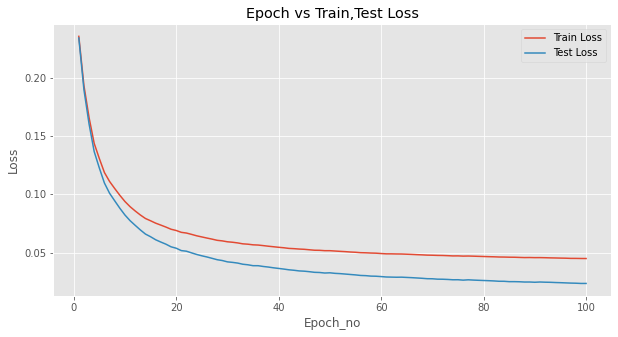

In [35]:
epochs = np.arange(1, epochs+1, 1)
plt.figure(figsize=(10, 5))
plt.plot(epochs, train_loss, label='Train Loss')
plt.plot(epochs, test_loss, label='Test Loss')
plt.title('Epoch vs Train,Test Loss')
plt.xlabel("Epoch_no")
plt.ylabel('Loss')
plt.legend()
print(100*'==')

In [ ]:
#cm = confusion_matrix(y_true = y_train , y_pred = pred(w,b,x_train))

In [43]:
## This function the official sklearn function
## Refer https://scikit-learn.org/0.18/auto_examples/model_selection/plot_confusion_matrix.html
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, cm[i, j],
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
# Ploting the confusion matrix
# cm_plot_labels = ['B','M']
# plot_confusion_matrix(cm=cm,classes = cm_plot_labels , title = 'Confusion_Matrix')

## Accuracy Plots and Stuff 
